In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Trulia_Real_Estate.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'City', 'Neighbourhood', 'Price', 'Year Built',
       'Beds', 'Baths', 'Area', 'Price(per sqft)', 'A/C'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
0,137-08 31st Rd #2,"Flushing, NY 11354",Flushing,"$628,000",Year Built: 2007,2 Beds,2 Baths,842 sqft,$746,No
1,97-40 62nd Dr #8F,"Rego Park, NY 11374",Rego Park,"$285,000",Year Built: 1955,1 Bed,1 Bath,Null,No Info,Heating only
2,117 E 57th St #41F,"New York, NY 10022",Midtown,"$752,400",Year Built: 1975,Studio,1 Bath,513 sqft,"$1,467",No
3,433 Monroe St,"Brooklyn, NY 11221",Bedford Stuyvesant,"$2,195,000",Year Built: 1899,5 Beds,4 Baths,"2,400 sqft",$915,Heating & Cooling
4,661 Amsterdam Ave #5E,"New York, NY 10025",Upper West Side,"$1,249,500",Year Built: 1940,2 Beds,2 Baths,"100,964 sqft (on 0.46 acres)",$12,No


In [ ]:
#data cleaning

In [ ]:
n1= df["City"].str.split(",", n=1, expand=True)[0]
df["City"] = n1

In [ ]:
n2= df["Year Built"].str.split(": ", n=1, expand=True)[1]
df["Year Built"] = n2

In [ ]:
n3= df["Beds"].str.split(" ", n=1, expand=True)[0]
n3 = n3.str.replace('Studio', '0')
df["Beds"] = n3

In [ ]:
n4 = df["Baths"].str.split(" ", n=1, expand=True)[0]
df["Baths"] = n4

In [ ]:
n5 = df["Area"].str.split(" ", n=1, expand=True)[0]
n5 = n5.str.replace(',', '')
df["Area"] = n5

In [ ]:
n6 = df["Price(per sqft)"].str.split("$", n=1, expand=True)[1]
n6 = n6.str.replace(',', '')
df["Price(per sqft)"] = n6

In [ ]:
n7 = df["Price"].str.split("$", n=1, expand=True)[1]
n7 = n7.str.replace(',', '')
df["Price"] = n7

In [ ]:
df

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
0,137-08 31st Rd #2,Flushing,Flushing,628000,2007,2,2,842,746,No
1,97-40 62nd Dr #8F,Rego Park,Rego Park,285000,1955,1,1,Null,None,Heating only
2,117 E 57th St #41F,New York,Midtown,752400,1975,0,1,513,1467,No
3,433 Monroe St,Brooklyn,Bedford Stuyvesant,2195000,1899,5,4,2400,915,Heating & Cooling
4,661 Amsterdam Ave #5E,New York,Upper West Side,1249500,1940,2,2,100964,12,No
5,6243 79th St,Flushing,Middle Village,859000,1940,2,2,880,976,Heating only
6,1619 3rd Ave #3B,New York,Upper East Side,635000,1975,0,1,528,1203,Cooling only
7,2339 Matthews Ave #W,Bronx,Williamsbridge,569000,1950,5,2,Null,None,No
8,43 Joralemon St,Brooklyn,Brooklyn Heights,4500000,1845,5,6,3192,1410,No
9,195 Classon Ave #5,Brooklyn,Bedford Stuyvesant,1395000,2008,2,2,1185,1177,No


In [ ]:
#df

In [ ]:
#model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Year Built','Beds', 'Baths']]
        #,'Area']]

y = df[['Price']]

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [ ]:
X

,Year Built,Beds,Baths
0,2007,2,2
1,1955,1,1
2,1975,0,1
3,1899,5,4
4,1940,2,2
5,1940,2,2
6,1975,0,1
7,1950,5,2
8,1845,5,6
9,2008,2,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_test

,Year Built,Beds,Baths
3,1899,5,4
7,1950,5,2
2,1975,0,1
1,1955,1,1
10,1940,1,1
16,1932,1,1


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

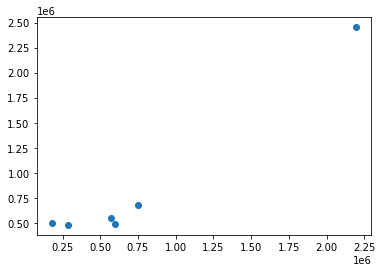

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, predictions)
r = r2_score(y_test, predictions)

print(f"R2 Score: {r}")
print(f"Mean Squared Error: {mse}")

R2 Score: 0.9173769059047686
Mean Squared Error: 36989467356.03604


In [ ]:
year = 1999
beds = 2
bath = 2

In [ ]:
price = lm.predict(pd.DataFrame([[year, beds, bath]],
                                            columns=['Year Built','Beds', 'Baths']))

In [ ]:
print(price)

[[1161169.28216895]]


In [ ]:
import pickle
pickle.dump(lm, open('model.pkl', 'wb'))


In [ ]:
# pickled_model = pickle.load(open('model.pkl', 'rb'))
# pickled_model.predict(X_test)

array([[2452864.36735764],
       [ 553072.82565731],
       [ 679449.39722464],
       [ 479552.04179735],
       [ 491012.57392885],
       [ 497124.85773232]])